# <center><font color='blue'>Building Machine Learning Pipelines: 

<h3><font color='red'>Problem Statement:</font></h3>

The main goal of this project is to perform extensive Exploratory Data Analysis(EDA) on
the Zomato Dataset and build an appropriate Machine Learning Model that will help
various Zomato Restaurants to predict their respective Ratings based on certain
features.

## the Lifecycle In A Data Science Projects
1. Data Preprocessing(EDA)                      --done
    1. Data Wrangling      --done
    2. Data Analysis -- done
    3. Feature engineering --done
    

2. Model Building                          --done
3. Model Deployment                        --done

## Step1. Data Pre Processing(EDA)

In [2]:
#importing libraries

# library for data reading and manipulation 
import pandas as pd
import numpy as np
import nums_from_string
import re
import math

# Library for visualisation
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette('Set1')
sns.set_context("notebook",font_scale=1.4)

# library for modeling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score



# library for warning ignorance
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading dataset
zomato_df=pd.read_csv('zomato.csv')

In [3]:
#shape of the dataset
print("(rows,columns)\n",zomato_df.shape)

(rows,columns)
 (51717, 17)


In [4]:
# info about the columns 
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

### Data Description

1. **url :** contains the url of the restaurant in the zomato website

2. **address :** contains the address of the restaurant in Bengaluru

3. **name :** contains the name of the restaurant

4. **online_order :** whether online ordering is available in the restaurant or not

5. **book_table :** table book option available or not

6. **rate :** contains the overall rating of the restaurant out of 5

7. **votes :** contains total number of rating for the restaurant as of the above mentioned date

8. **phone :** contains the phone number of the restaurant

9. **location :** contains the neighborhood in which the restaurant is located

10. **rest_type :** restaurant type

11. **dish_liked :** dishes people liked in the restaurant

12. **cuisines :** food styles, separated by comma

13. **approx_cost(for two people) :** contains the approximate cost of meal for two people

14. **reviews_list :** list of tuples containing reviews for the restaurant, each tuple

15. **menu_item :** contains list of menus available in the restaurant

16. **listed_in(type) :** type of meal

17. **listed_in(city) :** contains the neighborhood in which the restaurant is listed

In [5]:
# top 5 records
zomato_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
zomato_df.tail()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield
51716,https://www.zomato.com/bangalore/the-nest-the-...,"ITPL Main Road, KIADB Export Promotion Industr...",The Nest - The Den Bengaluru,No,No,3.4 /5,13,+91 8071117272,"ITPL Main Road, Whitefield","Bar, Casual Dining",NaN,"Finger Food, North Indian, Continental","1,500","[('Rated 5.0', 'RATED\n Great ambience , look...",[],Pubs and bars,Whitefield


### Step 1.A. Data Wrangling 

**lets explore target variable rate**

In [7]:
# checking for values for new restaurant
zomato_df.loc[zomato_df.rate=='NEW'].head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
72,https://www.zomato.com/bangalore/spicy-tandoor...,"Opposite ICICi Bank, Hanuman Nagar, Banashanka...",Spicy Tandoor,No,No,NEW,0,+91 8050884222,Banashankari,Quick Bites,NaN,North Indian,150,"[('Rated 4.0', 'RATED\n cost for chicken roll...",[],Delivery,Banashankari
75,https://www.zomato.com/bangalore/om-sri-vinaya...,"39, S B M Colony, Near-Sita Circle, 1st Stage,...",Om Sri Vinayaka Chats,No,No,NEW,0,+91 8553206035,Banashankari,"Takeaway, Delivery",NaN,"Street Food, Fast Food",500,[],[],Delivery,Banashankari
110,https://www.zomato.com/bangalore/hari-super-sa...,"594, 24 The Cross BSK, Opposte Oriental Bank, ...",Hari Super Sandwich,No,No,NEW,0,+91 9886722163,Banashankari,"Takeaway, Delivery",NaN,"Sandwich, Pizza, Beverages",200,"[('Rated 1.0', 'RATED\n I have been here many...",[],Delivery,Banashankari
130,https://www.zomato.com/bangalore/roll-magic-fa...,"28, 4th Cross Road, Dwaraka Nagar, Banashankar...",Roll Magic Fast Food,No,No,NEW,0,+91 9731409204,Banashankari,"Takeaway, Delivery",NaN,"Biryani, Rolls, Chinese",200,[],[],Delivery,Banashankari
131,https://www.zomato.com/bangalore/foodlieious-m...,"3/16, 22 Main Road, Magenta Block, PES College...",Foodlieious Multi Cuisine,No,No,NEW,0,+91 9168753522\r\n+91 8217877100,Banashankari,Quick Bites,NaN,North Indian,100,[],[],Delivery,Banashankari


the **reviews_list** column has some rating for the restaurant so we can extract those rating from there.

In [8]:
# lets count number of the new restaurant 
zomato_df[zomato_df.rate=='NEW'].rate.value_counts()

NEW    2208
Name: rate, dtype: int64

In [9]:
# defining two methods for rating value extraction from reviews_list column

# method-1
def rating_extract(x):
    j=[]
    list_a=re.findall(r"[-+]?\d*\.\d+|\d+", str(x))
    rating_list=[str(float(f)) for f in range(1,6)]
    for k in rating_list:
        if k in list_a:
            j.append(float(k))
            k=str(float(k)+0.1)
           
        else:   
            k=str(float(k)+0.1)
    if len(j)>0:
         return (str(round(np.mean(j),1))+'/5')
    else:
        return 'NEW'


# method-2
def rating_match(x,y):
    if x=='NEW':
        return rating_extract(y)
    else:
        return x

In [10]:
# creating new column rating  
zomato_df['rating'] = zomato_df.apply(lambda x: rating_match(x.rate, x.reviews_list), axis=1)

In [11]:
# now count of new restaurant are
zomato_df[zomato_df.rating=='NEW'].rating.value_counts()

NEW    1156
Name: rating, dtype: int64

In [12]:
zomato_df.rating.value_counts()

3.9/5     2098
3.8/5     2022
3.7/5     2013
3.9 /5    1874
3.8 /5    1851
          ... 
2.0 /5       7
2.2 /5       7
1.5/5        5
1.8 /5       3
1.8/5        2
Name: rating, Length: 67, dtype: int64

now rest of new restaurant wont be significant so lets drop these column for better modeling

In [13]:
# dropping rows of NEW restaurant 

zomato_df=zomato_df.loc[zomato_df.rate!='NEW']

the target variable **rate** has some values **-** as well which does not has any significant values so lets replace this value with null

In [14]:
print(zomato_df[zomato_df.rating=='-'].rating.value_counts())
print("null value count",zomato_df.rating.isnull().sum())

-    69
Name: rating, dtype: int64
null value count 7775


In [15]:
# replacing '-' with null
zomato_df=zomato_df.replace('-',np.nan)

In [16]:
print(zomato_df[zomato_df.rating=='-'].rating.value_counts())
print("new null value count",zomato_df.rating.isnull().sum())

Series([], Name: rating, dtype: int64)
new null value count 7844


In [17]:
# converting the rating column into float
zomato_df.rating=zomato_df.rating.apply(lambda x: str(x).split('/')[0]).astype(float)

In [18]:
zomato_df.rating.value_counts()

3.9    3972
3.8    3873
3.7    3821
3.6    3316
4.0    3183
4.1    2948
3.5    2784
3.4    2476
3.3    2310
4.2    2184
3.2    1873
4.3    1693
3.1    1561
4.4    1147
3.0    1023
2.9     802
4.5     656
2.8     600
2.7     307
4.6     300
2.6     260
4.7     167
2.5     101
2.4      70
4.8      66
4.9      55
2.3      51
2.2      26
2.1      24
2.0      11
1.8       5
Name: rating, dtype: int64

In [19]:
# dropping the duplicate column rate
zomato_df.drop('rate',inplace=True,axis=1)

In [20]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49509 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          49509 non-null  object 
 1   address                      49509 non-null  object 
 2   name                         49509 non-null  object 
 3   online_order                 49509 non-null  object 
 4   book_table                   49509 non-null  object 
 5   votes                        49509 non-null  int64  
 6   phone                        48315 non-null  object 
 7   location                     49488 non-null  object 
 8   rest_type                    49284 non-null  object 
 9   dish_liked                   23492 non-null  object 
 10  cuisines                     49464 non-null  object 
 11  approx_cost(for two people)  49164 non-null  object 
 12  reviews_list                 49509 non-null  object 
 13  menu_item       

**lets explore approx_cost(for two people) column**

In [21]:
zomato_df['approx_cost(for two people)'].value_counts()

300      7127
400      6304
500      4765
200      4512
600      3561
         ... 
60          1
70          1
469         1
5,000       1
3,700       1
Name: approx_cost(for two people), Length: 68, dtype: int64

this column datatype is object but it holds the cost value so lets convert this column value to float value

In [22]:
# converting the 'approx_cost(for two people)' dtype to float
zomato_df['approx_cost(for two people)']=zomato_df['approx_cost(for two people)'].str.replace(',','')
zomato_df['approx_cost(for two people)']=zomato_df['approx_cost(for two people)'].astype('float')

In [23]:
# replacing insignificant values with null values of column reviews_list
zomato_df.reviews_list=zomato_df.reviews_list.replace('[]',np.nan)

In [24]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49509 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          49509 non-null  object 
 1   address                      49509 non-null  object 
 2   name                         49509 non-null  object 
 3   online_order                 49509 non-null  object 
 4   book_table                   49509 non-null  object 
 5   votes                        49509 non-null  int64  
 6   phone                        48315 non-null  object 
 7   location                     49488 non-null  object 
 8   rest_type                    49284 non-null  object 
 9   dish_liked                   23492 non-null  object 
 10  cuisines                     49464 non-null  object 
 11  approx_cost(for two people)  49164 non-null  float64
 12  reviews_list                 43069 non-null  object 
 13  menu_item       

In [25]:
zomato_df.location.value_counts().tail(50)

Jeevan Bhima Nagar               262
Wilson Garden                    231
Bommanahalli                     226
Koramangala 3rd Block            216
Kumaraswamy Layout               188
Basaveshwara Nagar               183
Nagawara                         179
Thippasandra                     175
Seshadripuram                    165
Infantry Road                    151
Majestic                         148
Hennur                           146
HBR Layout                       141
Race Course Road                 137
City Market                      124
Yeshwantpur                      119
Varthur Main Road, Whitefield    110
ITPL Main Road, Whitefield       107
South Bangalore                  105
Hosur Road                       102
Kaggadasapura                    100
Koramangala 2nd Block             97
CV Raman Nagar                    85
RT Nagar                          77
Sanjay Nagar                      74
Vijay Nagar                       73
Sadashiv Nagar                    63
S

In [26]:
zomato_df[zomato_df.location!=zomato_df['listed_in(city)']][['address','location','listed_in(city)']].head(15)

,address,location,listed_in(city)
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Basavanagudi,Banashankari
5,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Basavanagudi,Banashankari
6,"19/1, New Timberyard Layout, Beside Satellite ...",Mysore Road,Banashankari
29,"112, Bull Temple Road,next to more Basavanagud...",Basavanagudi,Banashankari
30,"30, Surveyor Street, DVG Road, Basavanagudi, B...",Basavanagudi,Banashankari
38,"4, Opposite NMKRV College, 21st C Cross Road, ...",Jayanagar,Banashankari
40,"39, 3rd Main,4th Cross, Hanumanth Nagar, Near,...",Basavanagudi,Banashankari
46,"1750, 14th Main, Police Station Road, Kumarasw...",Kumaraswamy Layout,Banashankari
47,"1621, 1st Floor, 50 Feet Main Road, Kumaraswam...",Kumaraswamy Layout,Banashankari
48,"179, 1st Floor, Jawarlalnehru Road, BEML Layou...",Rajarajeshwari Nagar,Banashankari


**location** feature has some values with comma which wont add values and there is some mismatch between location,address and listed_in(city) but location and address matching mostly so lets remove the comma from location and drop the columns address and listed_in(city)

In [27]:
def remove_comma(s):
    if type(s)==str:
        string_list=s.split(',')
        if len(string_list)>1:
            return string_list[-1].strip()
        else:
            return s
    else:
        return np.nan

In [28]:
zomato_df.location=zomato_df.location.apply(remove_comma)

**Filtering out the unneccesary column**

In [29]:
# checking for unique values
zomato_df.nunique().sort_values(ascending=False)

url                            49509
reviews_list                   22075
phone                          14410
address                        11056
menu_item                       8784
name                            8463
dish_liked                      5228
cuisines                        2632
votes                           2328
rest_type                         93
location                          91
approx_cost(for two people)       68
rating                            31
listed_in(city)                   30
listed_in(type)                    7
book_table                         2
online_order                       2
dtype: int64

column **url** has same number of unique values as the length of the dataset, so lets drop this column & column **phone** doesnt hold any useful information so lets drop this column as well.

In [30]:
# dropping column url & phone from the dataset
zomato_df.drop(columns=['url','phone','address','listed_in(city)'],axis=1,inplace=True)

In [31]:
zomato_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49509 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         49509 non-null  object 
 1   online_order                 49509 non-null  object 
 2   book_table                   49509 non-null  object 
 3   votes                        49509 non-null  int64  
 4   location                     49488 non-null  object 
 5   rest_type                    49284 non-null  object 
 6   dish_liked                   23492 non-null  object 
 7   cuisines                     49464 non-null  object 
 8   approx_cost(for two people)  49164 non-null  float64
 9   reviews_list                 43069 non-null  object 
 10  menu_item                    49509 non-null  object 
 11  listed_in(type)              49509 non-null  object 
 12  rating                       41665 non-null  float64
dtypes: float64(2), i

### Step.1.B. Data Analysis

### Univariate Analysis

#### Numerical Features

**1. rating**

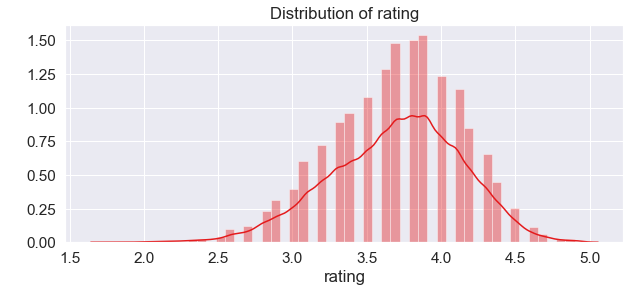

In [32]:
# distribution of the rating feature
plt.figure(figsize=(10,4))
sns.distplot(zomato_df.rating)
plt.ylabel(' ')
plt.title('Distribution of rating')
plt.show()

In [33]:
# plotting pie chart for rating feature

# creating labels and pie chart slices
labels = ['poor', 'average', 'good','very good']
rating_sizes =[((zomato_df['rating']>=1) & (zomato_df['rating']<2)).sum(),
               ((zomato_df['rating']>=2) & (zomato_df['rating']<3)).sum(),
               ((zomato_df['rating']>=3) & (zomato_df['rating']<4)).sum(),
               (zomato_df['rating']>=4).sum()
              ]


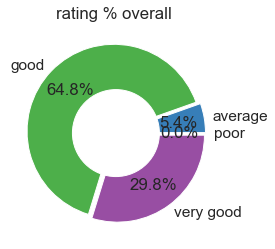

In [34]:
# plotting pie chart
explode = (0.03, 0.03, 0.03, 0.03)

plt.pie(rating_sizes, labels=labels, autopct='%1.1f%%', pctdistance=0.70,explode=explode)

# draw circle
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
plt.title("rating % overall ")
plt.show()

**insights:**
1. rating feature is normaly distributed.
2. good rating(>=3 and <4) is the highly rated.  

**2. approx_cost(for two people)**

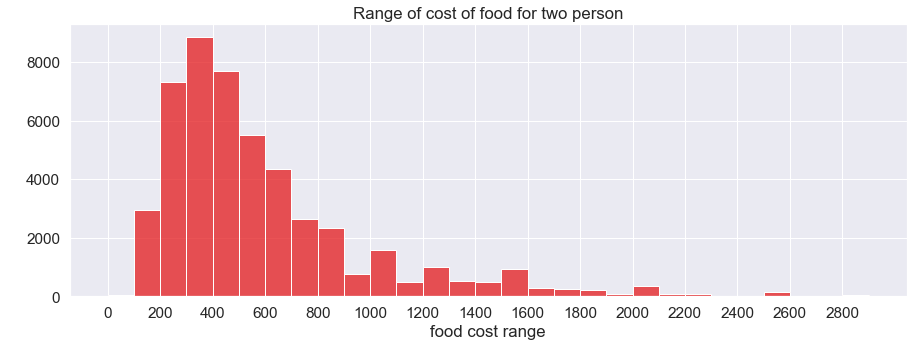

In [35]:
plt.figure(figsize=(15,5))
sns.histplot(zomato_df,x='approx_cost(for two people)',bins=range(0, 3000, 100))
plt.xticks(range(0,3000,200))
plt.xlabel('food cost range')
plt.ylabel(" ")
plt.title("Range of cost of food for two person")
plt.show()

**Insights:**
1. In bengaluru the food cost range mostly is between 300-400 for two person.
2. this feature is skewed towards left that means this features has some high value outliers. 

**3. votes**

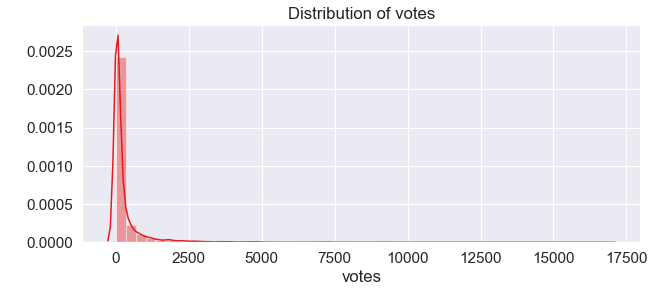

In [36]:
# distribution of the rating feature
plt.figure(figsize=(10,4))
sns.distplot(zomato_df.votes)
plt.ylabel(' ')
plt.title('Distribution of votes')
plt.show()

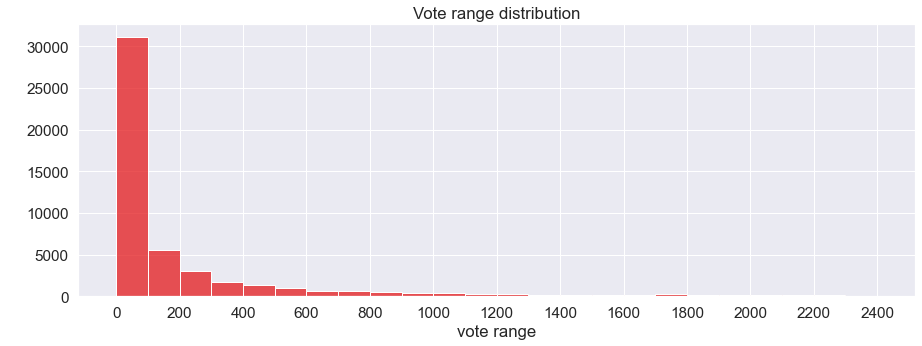

In [37]:
plt.figure(figsize=(15,5))
sns.histplot(zomato_df,x='votes',bins=range(0,2500,100))
plt.xticks(range(0,2500,200))
plt.xlabel('vote range')
plt.ylabel(" ")
plt.title("Vote range distribution")
plt.show()

**Insight:**
1. Vote feature is highly skewed towards left, which leads towards high value outliers.
2. most of the votes are fall under range from 0-100.

#### Categorical Features

**4. name feature**

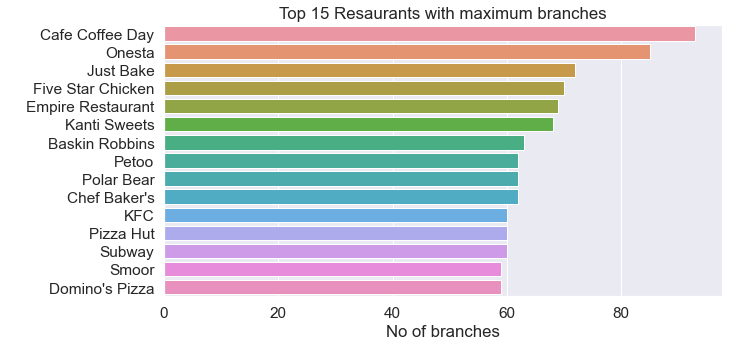

In [38]:
plt.figure(figsize=(10,5))
top_15_restaurants=zomato_df.groupby(['name'])['name'].count().sort_values(ascending=False).head(15)
sns.barplot(x=top_15_restaurants,y=top_15_restaurants.index)
plt.xlabel('No of branches')
plt.ylabel(' ')
plt.title('Top 15 Resaurants with maximum branches')
plt.show()

**Insight:**
1. Cafe coffe day has highest no of branches in bengaluru.

**5. dish_liked**

In [39]:
# creating temporary dataframe without null values of dish_liked for visualisation
df_dishes=zomato_df[~zomato_df.dish_liked.isnull()]

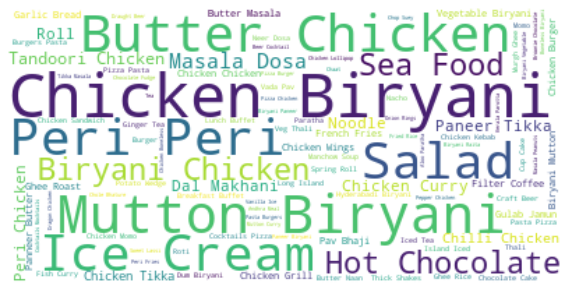

In [40]:
# plotting word cloud for most liked dishes

plt.figure(figsize=(10,10))
text = " ".join(dish for dish in df_dishes.dish_liked)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**6. cuisines**

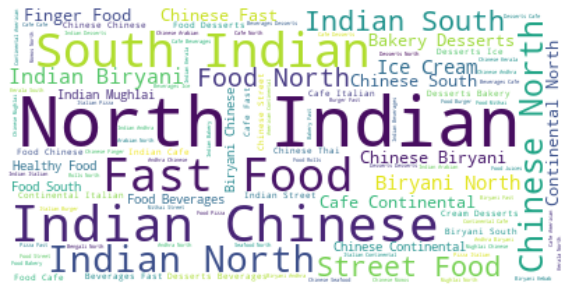

In [41]:
# creating temporary dataframe without null values of cuisines for visualisation
df_cuisine=zomato_df[~zomato_df.cuisines.isnull()]
# plotting word cloud for most offered cuisines

plt.figure(figsize=(10,10))
text = " ".join(cuis for cuis in df_cuisine.cuisines)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Insight:**
1. North indian type cuisines is most offered type cuisines by restaurants.


**Insight:**
so most liked dishes are chicken biryani,mutton biryani and butter chicken 

**7.online_order & book_table**

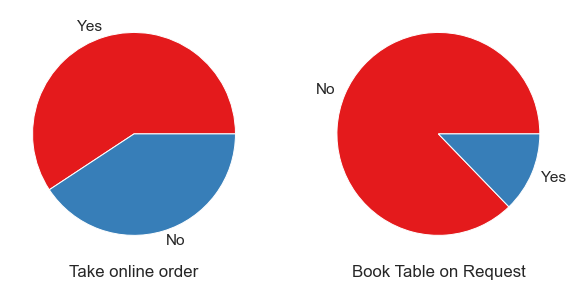

In [42]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
zomato_df.online_order.value_counts(normalize=True).plot.pie()
plt.xlabel('Take online order')
plt.ylabel('')

plt.subplot(1,2,2)
zomato_df.book_table.value_counts(normalize=True).plot.pie()
plt.xlabel('Book Table on Request')
plt.ylabel(' ')
plt.show()

**Insight:**
1. Most of the restaurant take online order.
2. Most of the restaurant dont take Book table request.

**8. rest_type**

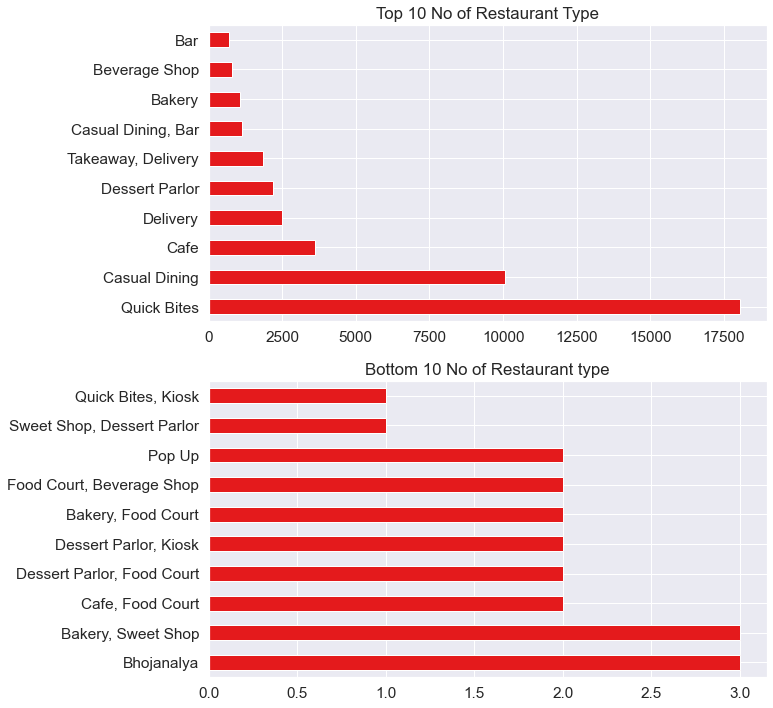

In [43]:
plt.figure(figsize=(10,12))
plt.subplot(2,1,1)
zomato_df.rest_type.value_counts().head(10).plot.barh()
plt.title('Top 10 No of Restaurant Type')
plt.subplot(2,1,2)
zomato_df.rest_type.value_counts().tail(10).plot.barh()
plt.title('Bottom 10 No of Restaurant type')
plt.show()

**Insight:**
1. The most restaurant type availbale is Quick bites which is very obvious.
2. Food court type restaurant is not very much available.

### Bivariate Analysis with respect to target variable

**1. rating vs approx cost /two person**

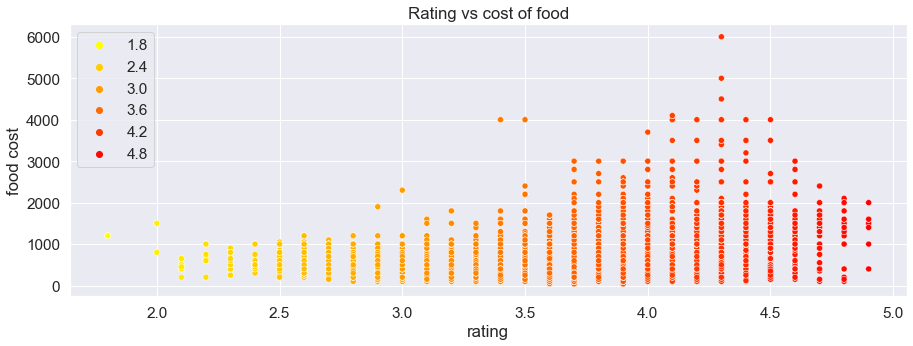

In [44]:
plt.figure(figsize=(15,5))
sns.scatterplot(zomato_df.rating,zomato_df['approx_cost(for two people)'],hue=zomato_df.rating,palette='autumn_r')
plt.legend(loc='upper left')
plt.ylabel('food cost')
plt.title('Rating vs cost of food')
plt.show()

**Insights:**
1. as already observed most of the rating was between 3.0-4.0 and between this range the cost of food is about 2000, yes there are still some cost is about 4000 for two person, which is clearly an oulier.
2. as the rating of restaurant increases the cost of the food is also increases.
3. But still for rating range between 4.5-5 the cost of food is about 2000.
4. Expensive restaurant rating ranges from 4.0-4.5.

**2. Rating vs no of votes registered**

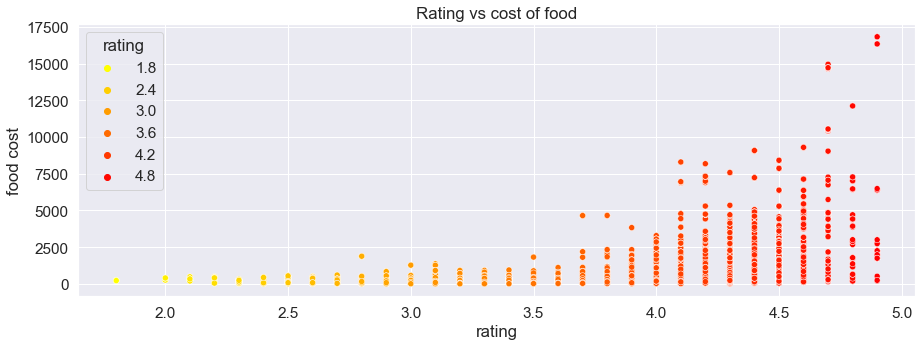

In [45]:
plt.figure(figsize=(15,5))
sns.scatterplot(zomato_df.rating,zomato_df.votes,hue=zomato_df.rating,palette='autumn_r')
plt.ylabel('food cost')
plt.title('Rating vs cost of food')
plt.show()

**Insight:**
1. most of votes are registered around 4.5.
2. observed some outliers here too.

**3. Top 10 Highly vs Least Rated Restaurant**

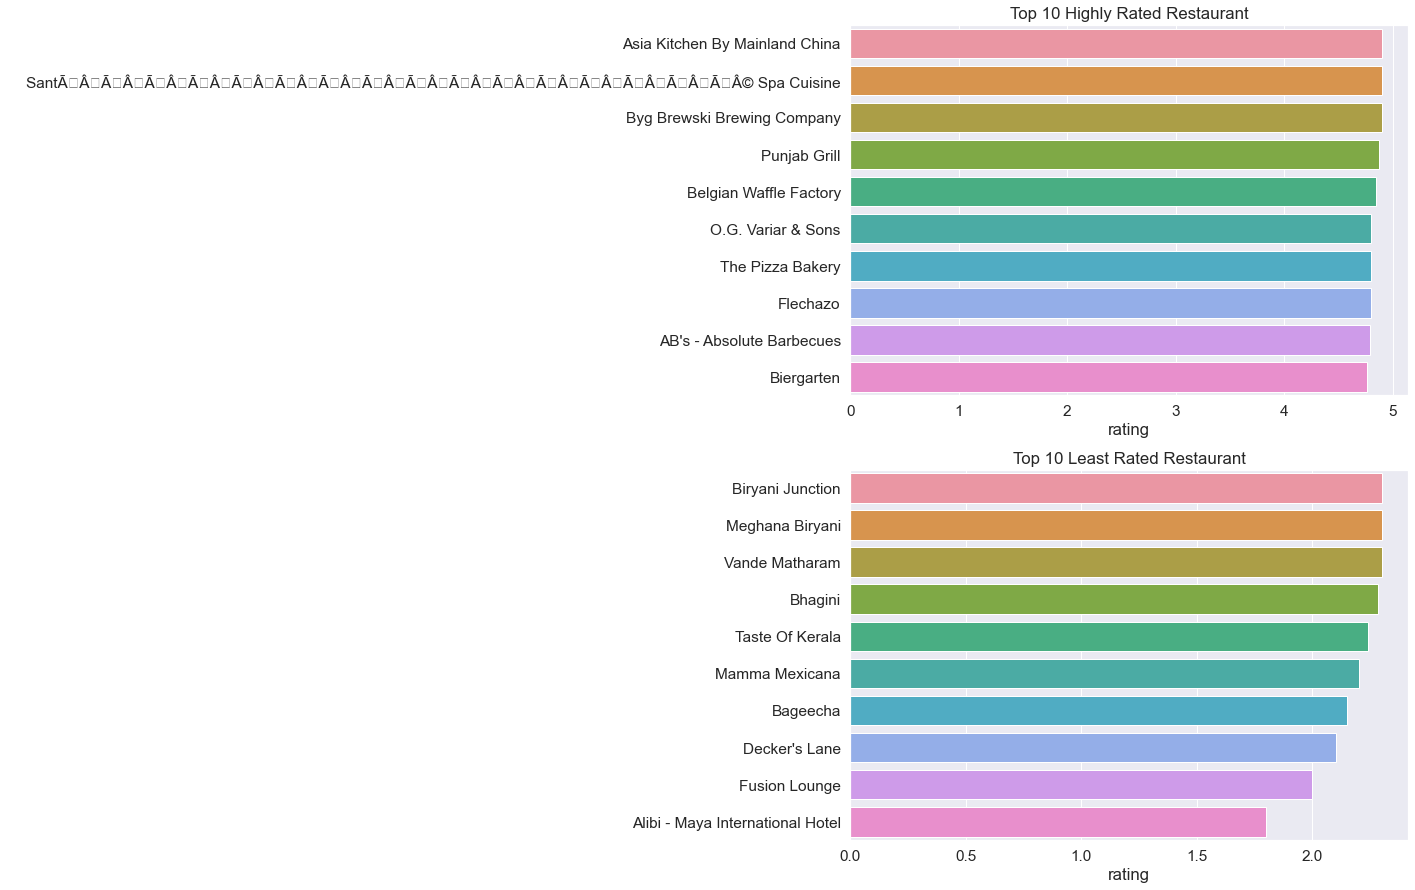

In [46]:
plt.figure(figsize=(10,15))

df1=zomato_df[~zomato_df.rating.isnull()]
rest_rating_df=df1.groupby(['name'])['rating'].mean().sort_values(ascending=False)

top_10=rest_rating_df.head(10)
bottom_10=rest_rating_df.tail(10)

plt.subplot(2,1,1)
sns.barplot(y=top_10.index,x=top_10)
plt.ylabel(' ')
plt.title('Top 10 Highly Rated Restaurant')

plt.subplot(2,1,2)
sns.barplot(y=bottom_10.index,x=bottom_10)
plt.ylabel(' ')
plt.title('Top 10 Least Rated Restaurant')

plt.show()

**Insight:**
1. Asia Kitchen by Mainland china is the highly rated restaurant.
2. Alibi-Maya International Hotel is the least rates restaurant.

**4. Most and least popular location**

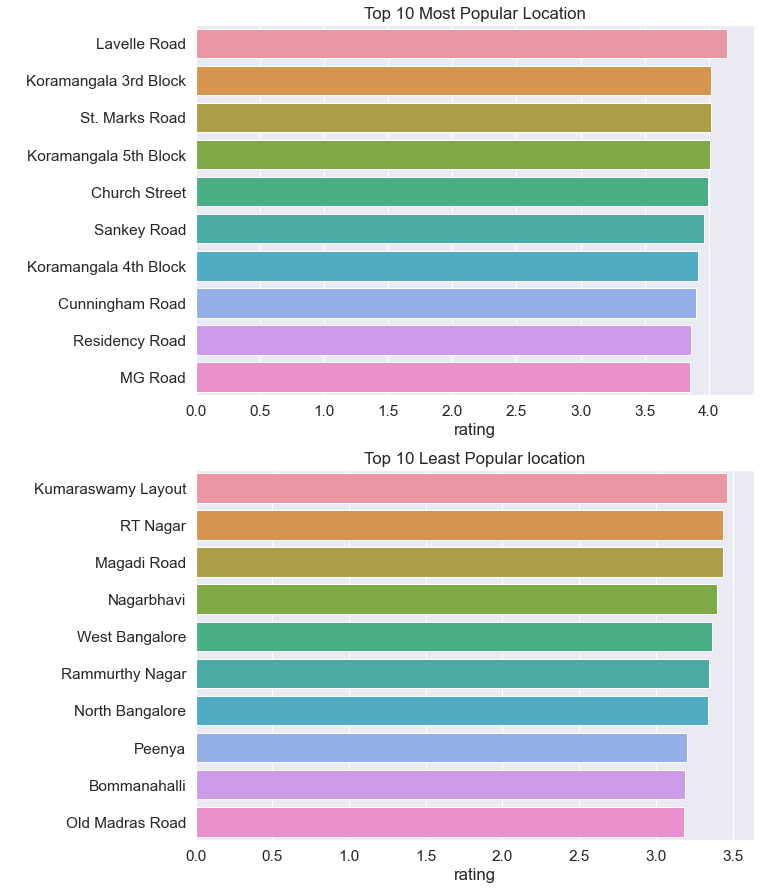

In [47]:
plt.figure(figsize=(10,15))

df1=zomato_df[~zomato_df.rating.isnull()]
loc_rating_df=df1.groupby(['location'])['rating'].mean().sort_values(ascending=False)

top_10=loc_rating_df.head(10)
bottom_10=loc_rating_df.tail(10)

plt.subplot(2,1,1)
sns.barplot(y=top_10.index,x=top_10)
plt.ylabel(' ')
plt.title('Top 10 Most Popular Location')

plt.subplot(2,1,2)
sns.barplot(y=bottom_10.index,x=bottom_10)
plt.ylabel(' ')
plt.title('Top 10 Least Popular location')

plt.show()

**Insight:**
1. Most Popular locality is Lavelle Road and the least popular is old madras road.

**5. Most Polpular Restaurant Type**

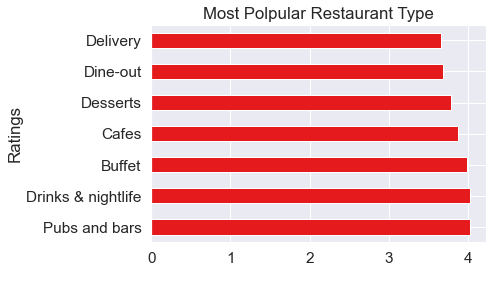

In [48]:
zomato_df.groupby(['listed_in(type)'])['rating'].mean().sort_values(ascending=False).plot.barh()
plt.xlabel(' ')
plt.ylabel('Ratings')
plt.title('Most Polpular Restaurant Type')
plt.show()

**Insight:**
1. since bengaluru is silicon valley for india where everybody wants to enjoy nightlife so thats why drinks & nighlife and Pubs & bar type restaurant is highly rated. 

### Multivariate Analysis

**votes vs rating vs cost of food**

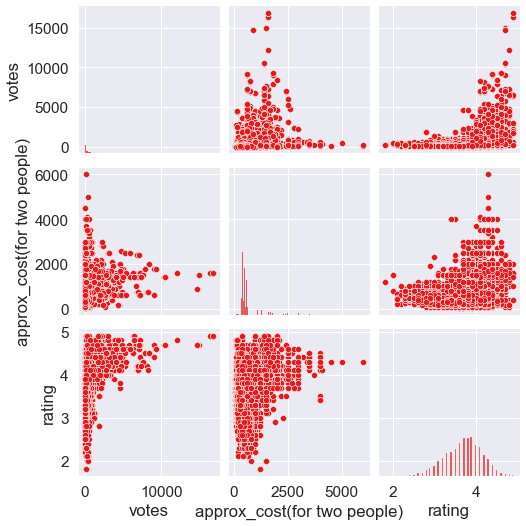

In [49]:
sns.pairplot(zomato_df)

plt.show()

**Insight:**
1. the feature votes and cost of food is highly skewed

### Step 1.C. Feature Engineering

**Techniques:**

    1.Missing Values Imputation --done
    2.Handling Outliers --done
    3.Skewness check --done
    4.One-Hot Encoding --done
    5.Train & Test spliting --done
    6.Scaling --done
    

### Missing Value Imputation

In [50]:
# missing value % column wise in decending order

((zomato_df.isnull().sum()/len(zomato_df))*100).sort_values(ascending=False)

dish_liked                     52.550041
rating                         15.843584
reviews_list                   13.007736
approx_cost(for two people)     0.696843
rest_type                       0.454463
cuisines                        0.090893
location                        0.042417
name                            0.000000
online_order                    0.000000
book_table                      0.000000
votes                           0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
dtype: float64

**dish_liked feature**

the column **dish_liked** has more than 50% null values rows. so this wont add meaning to modeling so lets drop this column. but before that lets visualise some information about this column

In [51]:
# dropping column dish_liked
zomato_df.drop('dish_liked',inplace=True,axis=1)

In [52]:
# rechecking the null values

((zomato_df.isnull().sum()/len(zomato_df))*100).sort_values(ascending=False)

rating                         15.843584
reviews_list                   13.007736
approx_cost(for two people)     0.696843
rest_type                       0.454463
cuisines                        0.090893
location                        0.042417
name                            0.000000
online_order                    0.000000
book_table                      0.000000
votes                           0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
dtype: float64

**rating feature**

In [53]:
# missing value handling for target variable rating
zomato_df[zomato_df.rating.isnull()].head()

,name,online_order,book_table,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),rating
84,Chill Out,No,No,0,Banashankari,Quick Bites,"South Indian, Chinese",100.0,"[('Rated 4.0', 'RATED\n Good Location. Small ...",[],Delivery,NaN
90,Me And My Cake,No,No,0,Banashankari,Delivery,"Bakery, Desserts",500.0,"[('Rated 1.0', 'RATED\n Do not order anything...",[],Delivery,NaN
91,Sunsadm,No,No,0,Banashankari,"Takeaway, Delivery",South Indian,400.0,NaN,[],Delivery,NaN
92,Annapooraneshwari Mess,No,No,0,Banashankari,Mess,South Indian,200.0,NaN,[],Delivery,NaN
107,Coffee Shopee,No,No,0,Banashankari,"Takeaway, Delivery",Beverages,250.0,NaN,[],Delivery,NaN


so review list has some rating value for null value of rating so lets replace those values with rating from review_list column

In [54]:
# defining two methods for rating value extraction from reviews_list column

# method-1
def null_imputation(y):
    i=1.0
    while i<6.0:
        if str(i) in str(y):
            return i
        else:
            i=round(i+0.1,1)
    return np.nan


# method-2
def rating_null(x,y):
    
    if(pd.isnull(x)):
        return null_imputation(y)
    else:
        return x

In [55]:
# defining two methods for rating value extraction from reviews_list column

# method-1
def null_imputation(x):
    j=[]
    list_a=re.findall(r"[-+]?\d*\.\d+|\d+", str(x))
    rating_list=[str(float(f)) for f in range(1,6)]
    for k in rating_list:
        if k in list_a:
            j.append(float(k))
            k=str(float(k)+0.1)
           
        else:   
            k=str(float(k)+0.1)
    if len(j)>0:
         return (round(np.mean(j),1))
    else:
        return np.nan


# method-2
def rating_null(x,y):
    
    if(pd.isnull(x)):
        return null_imputation(y)
    else:
        return x

In [56]:
# creating new column rating  
zomato_df['rating'] = zomato_df.apply(lambda x: rating_null(x.rating, x.reviews_list), axis=1)

In [57]:
# checking of top null values of target variable
zomato_df[zomato_df.rating.isnull()].head(10)

,name,online_order,book_table,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),rating
91,Sunsadm,No,No,0,Banashankari,"Takeaway, Delivery",South Indian,400.0,NaN,[],Delivery,NaN
92,Annapooraneshwari Mess,No,No,0,Banashankari,Mess,South Indian,200.0,NaN,[],Delivery,NaN
107,Coffee Shopee,No,No,0,Banashankari,"Takeaway, Delivery",Beverages,250.0,NaN,[],Delivery,NaN
113,Dharwad Line Bazaar Mishra Pedha,No,No,0,Banashankari,Dessert Parlor,Mithai,150.0,NaN,[],Delivery,NaN
115,Aarush's Food Plaza,No,No,0,Banashankari,Quick Bites,"North Indian, Street Food",200.0,NaN,[],Delivery,NaN
117,Kulfi & More,No,No,0,Banashankari,Dessert Parlor,"Ice Cream, Desserts, Juices",150.0,NaN,[],Delivery,NaN
118,Kannadigas Karavali,No,No,0,Banashankari,Quick Bites,"Mangalorean, South Indian, North Indian",250.0,NaN,[],Delivery,NaN
125,Soms Kitchen & Bakes,No,No,0,Banashankari,Delivery,"South Indian, North Indian, Continental",400.0,NaN,[],Delivery,NaN
126,Banashankari Nati Style,No,No,0,Banashankari,Quick Bites,"Biryani, Chinese, South Indian, North Indian",350.0,NaN,[],Delivery,NaN
128,Mohitesh Hut Roll,No,No,0,Banashankari,Quick Bites,"Rolls, North Indian",150.0,NaN,[],Delivery,NaN


In [58]:
# rechecking missing value % column wise in decending order

((zomato_df.isnull().sum()/len(zomato_df))*100).sort_values(ascending=False)

reviews_list                   13.007736
rating                         11.076774
approx_cost(for two people)     0.696843
rest_type                       0.454463
cuisines                        0.090893
location                        0.042417
name                            0.000000
online_order                    0.000000
book_table                      0.000000
votes                           0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
dtype: float64

the column reviews_list has 13% null values and this column has reviews comment list so null values can not be replaced by some mean,median or mode value.. so lets drop those null values rows from the dataset

In [59]:
zomato_df=zomato_df[~zomato_df.reviews_list.isnull()]

In [60]:
# rechecking the null value %
((zomato_df.isnull().sum()/len(zomato_df))*100).sort_values(ascending=False)

approx_cost(for two people)    0.682626
rating                         0.383106
rest_type                      0.359888
cuisines                       0.034828
name                           0.000000
online_order                   0.000000
book_table                     0.000000
votes                          0.000000
location                       0.000000
reviews_list                   0.000000
menu_item                      0.000000
listed_in(type)                0.000000
dtype: float64

In [61]:
# dropping null values rows for rating which is very low now
zomato_df=zomato_df[~zomato_df.rating.isnull()]

In [62]:
# rechecking the null values

((zomato_df.isnull().sum()/len(zomato_df))*100).sort_values(ascending=False)

approx_cost(for two people)    0.680589
rest_type                      0.361272
cuisines                       0.034962
name                           0.000000
online_order                   0.000000
book_table                     0.000000
votes                          0.000000
location                       0.000000
reviews_list                   0.000000
menu_item                      0.000000
listed_in(type)                0.000000
rating                         0.000000
dtype: float64

**approx_cost(for two people) feature**

In [63]:
zomato_df['approx_cost(for two people)'].describe()

count    42612.000000
mean       592.222050
std        457.935397
min         40.000000
25%        300.000000
50%        450.000000
75%        700.000000
max       6000.000000
Name: approx_cost(for two people), dtype: float64

from above information its clear this feature has outlier so for missing value imputation will use median value.

In [64]:
# null value imputation with median
zomato_df['approx_cost(for two people)']=zomato_df['approx_cost(for two people)'].fillna(zomato_df['approx_cost(for two people)'].median())

In [65]:
# rechecking the null values

((zomato_df.isnull().sum()/len(zomato_df))*100).sort_values(ascending=False)

rest_type                      0.361272
cuisines                       0.034962
name                           0.000000
online_order                   0.000000
book_table                     0.000000
votes                          0.000000
location                       0.000000
approx_cost(for two people)    0.000000
reviews_list                   0.000000
menu_item                      0.000000
listed_in(type)                0.000000
rating                         0.000000
dtype: float64

**rest_type & cuisines features**

In [66]:
# value count % in rest_type feature
zomato_df.rest_type.value_counts(normalize=True)*100

Quick Bites                   34.120096
Casual Dining                 22.641465
Cafe                           7.930010
Dessert Parlor                 4.622330
Delivery                       4.308873
                                ...    
Dessert Parlor, Kiosk          0.004678
Dessert Parlor, Food Court     0.004678
Bakery, Food Court             0.004678
Food Court, Beverage Shop      0.004678
Quick Bites, Kiosk             0.002339
Name: rest_type, Length: 87, dtype: float64

In [67]:
# value count % in cuisines feature
zomato_df.cuisines.value_counts(normalize=True)*100

North Indian                                            5.327706
North Indian, Chinese                                   4.663200
South Indian                                            3.047401
Bakery, Desserts                                        1.608804
Cafe                                                    1.461913
                                                          ...   
Biryani, Hyderabadi, Charcoal Chicken, North Indian     0.002332
Cafe, Continental, North Eastern, Chinese, Fast Food    0.002332
Mexican, American                                       0.002332
North Indian, Andhra, Chinese, Seafood                  0.002332
Mithai, Gujarati                                        0.002332
Name: cuisines, Length: 2410, dtype: float64

lets impute the missing values with most frequent values using mode() for the both column 

In [68]:
zomato_df.rest_type=zomato_df.rest_type.fillna(zomato_df.rest_type.mode()[0])

zomato_df.cuisines=zomato_df.cuisines.fillna(zomato_df.cuisines.mode()[0])

In [69]:
# rechecking the null values

((zomato_df.isnull().sum()/len(zomato_df))*100).sort_values(ascending=False)

name                           0.0
online_order                   0.0
book_table                     0.0
votes                          0.0
location                       0.0
rest_type                      0.0
cuisines                       0.0
approx_cost(for two people)    0.0
reviews_list                   0.0
menu_item                      0.0
listed_in(type)                0.0
rating                         0.0
dtype: float64

**All null values are handled successfully**

### Handling Outliers

In [70]:
zomato_df.kurtosis()

votes                          75.926530
approx_cost(for two people)     9.518736
rating                          4.805013
dtype: float64

In [71]:
zomato_df.describe()

,votes,approx_cost(for two people),rating
count,42904.000000,42904.000000,42904.000000
mean,339.747063,591.254102,3.688090
std,868.966695,456.524146,0.555844
min,0.000000,40.000000,1.000000
25%,18.000000,300.000000,3.400000
50%,67.000000,450.000000,3.700000
75%,260.000000,700.000000,4.000000
max,16832.000000,6000.000000,5.000000


In [72]:
num_vars = [cols for cols in zomato_df.columns if zomato_df[cols].dtypes != 'O']

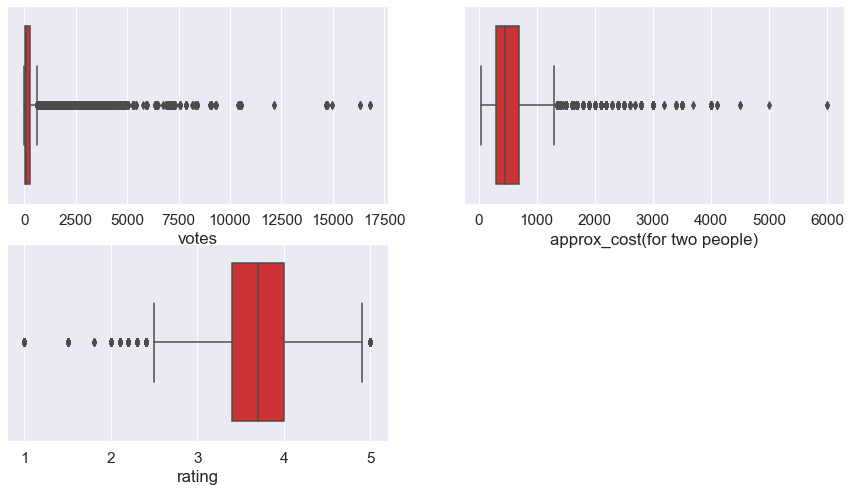

In [73]:
plt.figure(figsize=(15,8))
i, j = 2,2
for k in range(1, 4):
    plt.subplot(i, j, k)
    sns.boxplot(zomato_df[num_vars[k-1]])

In [74]:
# capping the outliers for 'votes'
percentiles = zomato_df['votes'].quantile([0.01, 0.86]).values
zomato_df['votes']=np.clip(zomato_df['votes'],percentiles[0],percentiles[1])

# capping the outliers for 'approx_cost(for two people)'
percentiles = zomato_df['approx_cost(for two people)'].quantile([0.01, 0.92]).values
zomato_df['approx_cost(for two people)']=np.clip(zomato_df['approx_cost(for two people)'],percentiles[0],percentiles[1])

In [75]:
percentiles = zomato_df['approx_cost(for two people)'].quantile([0.01, 0.92]).values
zomato_df['approx_cost(for two people)']=np.clip(zomato_df['approx_cost(for two people)'],percentiles[0],percentiles[1])

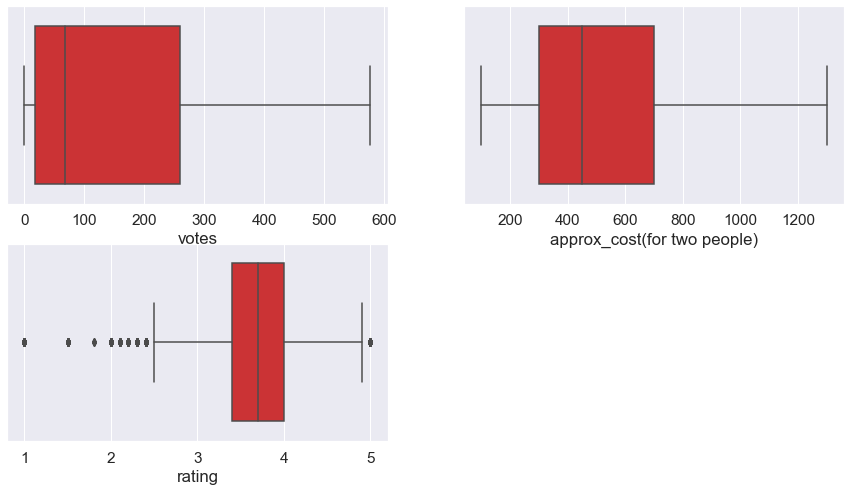

In [76]:
# replotting the boxplot
plt.figure(figsize=(15,8))
i, j = 2,2
for k in range(1, 4):
    plt.subplot(i, j, k)
    sns.boxplot(zomato_df[num_vars[k-1]])

since the rating column is our target column so capping will leads to loose some important information, so no capping for rating

**Most of outliers are handeled successfully**

### Handling Skewness

In [77]:
zomato_df.skew()

votes                          1.118553
approx_cost(for two people)    0.989899
rating                        -1.229829
dtype: float64

In [78]:
# checking value count % in votes column
zomato_df.votes.value_counts(normalize=True)*100

576.58    14.001026
0.00       5.479676
6.00       1.983498
4.00       1.946205
7.00       1.834328
            ...    
562.00     0.004662
513.00     0.004662
495.00     0.002331
575.00     0.002331
573.00     0.002331
Name: votes, Length: 575, dtype: float64

the **votes** feature is not skewed towards single value but the distribution of data is highly skewed which is because some restaurant received high vote count which is important info which we dont want to modify.

In [79]:
# value count % check for categorical variable for skewness
print( '\033[1m'+'online_order\n'+'\033[0m',zomato_df.online_order.value_counts(normalize=True)*100)
print('\033[1m''\n book_table \n'+'\033[0m',zomato_df.book_table.value_counts(normalize=True)*100)
print('\033[1m'+'\n Cuisines \n'+'\033[0m',zomato_df.cuisines.value_counts(normalize=True)*100)
print('\033[1m'+'\n name \n'+'\033[0m',zomato_df.name.value_counts(normalize=True)*100)
print('\033[1m'+'\n location \n'+'\033[0m',zomato_df.location.value_counts(normalize=True)*100)
print('\033[1m'+'\n listed_in(type) \n'+'\033[0m',zomato_df['listed_in(type)'].value_counts(normalize=True)*100)


online_order
 Yes    64.767854
No     35.232146
Name: online_order, dtype: float64

 book_table 
 No     85.437255
Yes    14.562745
Name: book_table, dtype: float64

 Cuisines 
 North Indian                                            5.360806
North Indian, Chinese                                   4.661570
South Indian                                            3.046336
Bakery, Desserts                                        1.608242
Cafe                                                    1.461402
                                                          ...   
Biryani, Hyderabadi, Charcoal Chicken, North Indian     0.002331
Cafe, Continental, North Eastern, Chinese, Fast Food    0.002331
Mexican, American                                       0.002331
North Indian, Andhra, Chinese, Seafood                  0.002331
Mithai, Gujarati                                        0.002331
Name: cuisines, Length: 2410, dtype: float64

 name 
 Cafe Coffee Day        0.207440
Onesta               

so only book_table is skewed with 85% value and others are good to go.

### 4. One-Hot Encoding

In [80]:
zomato_df_modeling=zomato_df.copy()
zomato_df_modeling.head(5)

,name,online_order,book_table,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),rating
0,Jalsa,Yes,Yes,576.58,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,4.1
1,Spice Elephant,Yes,No,576.58,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,4.1
2,San Churro Cafe,Yes,No,576.58,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,3.8
3,Addhuri Udupi Bhojana,No,No,88.00,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,3.7
4,Grand Village,No,No,166.00,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,3.8


In [81]:
# encoding binary features Yes to 1 and No to 0
zomato_df_modeling.online_order=zomato_df_modeling.online_order.apply(lambda x: 1 if x=='Yes' else 0)
zomato_df_modeling.book_table=zomato_df_modeling.book_table.apply(lambda x: 1 if x=='Yes' else 0)

In [82]:
zomato_df.head(5)

,name,online_order,book_table,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),rating
0,Jalsa,Yes,Yes,576.58,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,4.1
1,Spice Elephant,Yes,No,576.58,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,4.1
2,San Churro Cafe,Yes,No,576.58,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,3.8
3,Addhuri Udupi Bhojana,No,No,88.00,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,3.7
4,Grand Village,No,No,166.00,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,3.8


In [83]:
zomato_df_modeling.nunique().sort_values(ascending=False)

reviews_list                   22019
menu_item                       8456
name                            6855
cuisines                        2410
votes                            575
location                          88
rest_type                         87
rating                            34
approx_cost(for two people)       32
listed_in(type)                    7
online_order                       2
book_table                         2
dtype: int64

**reviews_list** and **menu_item** holding list of information and cuisines hold much more same info as menu_item hold so lets drop these two column

In [84]:
zomato_df_modeling.drop(columns=['reviews_list','menu_item','name'],axis=1,inplace=True)

In [85]:
zomato_df_modeling.head()

,online_order,book_table,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),rating
0,1,1,576.58,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,4.1
1,1,0,576.58,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,4.1
2,1,0,576.58,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,3.8
3,0,0,88.00,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,3.7
4,0,0,166.00,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,3.8


In [86]:
# initialising labelencoder object
le = LabelEncoder()

In [87]:
# encoding the rest of categorical variable
zomato_df_modeling['location_code'] = le.fit_transform(zomato_df_modeling.location)
zomato_df_modeling['rest_type_code'] = le.fit_transform(zomato_df_modeling.rest_type)
zomato_df_modeling['cuisines_code'] = le.fit_transform(zomato_df_modeling.cuisines)
zomato_df_modeling['listed_in(type)_code'] = le.fit_transform(zomato_df_modeling['listed_in(type)'] )

In [88]:
zomato_df_modeling.head()

,online_order,book_table,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),rating,location_code,rest_type_code,cuisines_code,listed_in(type)_code
0,1,1,576.58,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,4.1,1,24,1928,0
1,1,0,576.58,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,4.1,1,24,835,0
2,1,0,576.58,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,3.8,1,19,673,0
3,0,0,88.00,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,3.7,1,73,2262,0
4,0,0,166.00,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,3.8,4,24,1956,0


In [89]:
zomato_df_modeling[['location','location_code']].set_index('location',drop=True).drop_duplicates(keep ='first').to_csv('location.csv')

zomato_df_modeling[['rest_type','rest_type_code']].set_index('rest_type',drop=True).drop_duplicates(keep ='first').to_csv('rest_type.csv')

zomato_df_modeling[['cuisines','cuisines_code']].set_index('cuisines',drop=True).drop_duplicates(keep ='first').to_csv('cuisines.csv')


zomato_df_modeling[['listed_in(type)','listed_in(type)_code']].set_index('listed_in(type)',drop=True).drop_duplicates(keep ='first').to_csv('listed_in(type).csv')

zomato_df_modeling.drop(columns=['location','rest_type','cuisines','listed_in(type)'],inplace=True)

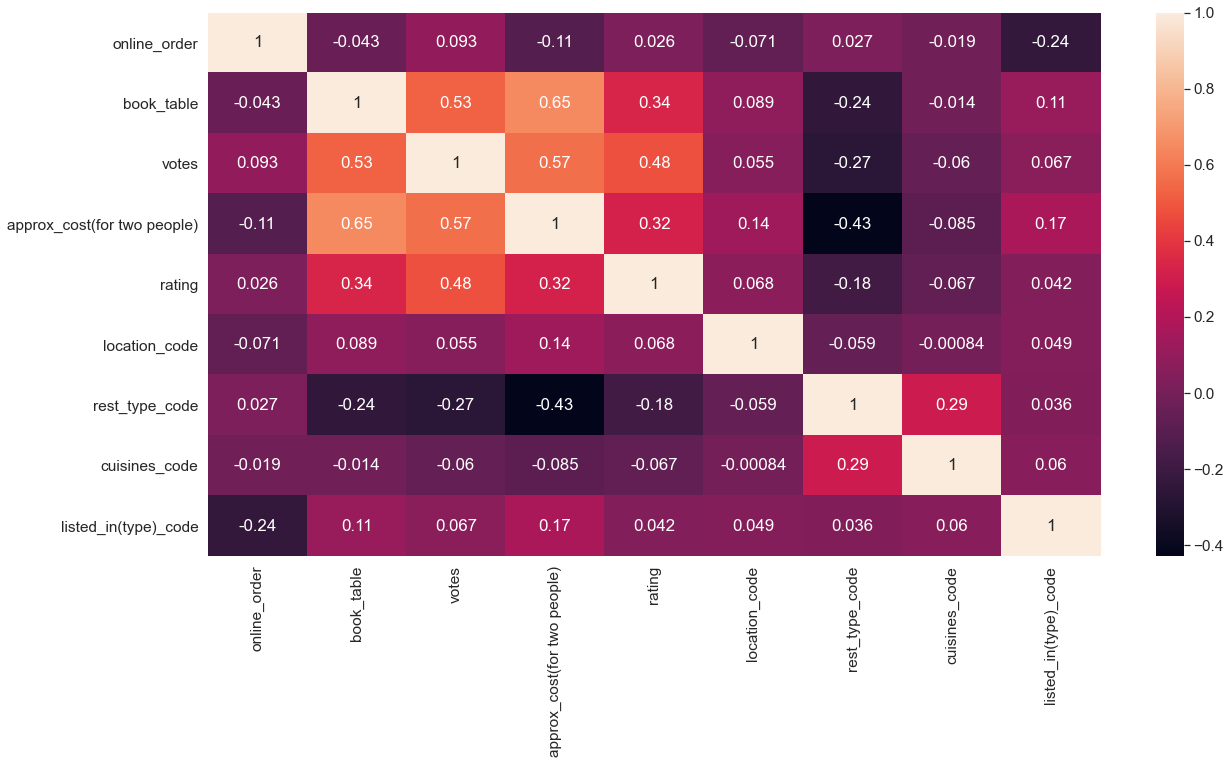

In [90]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(zomato_df_modeling.corr(),annot = True)
plt.show()

### 5. Train & Test spliting

In [91]:
X=zomato_df_modeling.drop('rating',axis=1)
y=zomato_df_modeling['rating']

In [92]:
print('size of X',X.shape)
print('size of y',y.shape)

size of X (42904, 8)
size of y (42904,)


In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [95]:
print('size of X_train',X_train.shape)
print('size of X_test',X_test.shape)

size of X_train (30032, 8)
size of X_test (12872, 8)


In [96]:
X_train.head()

,online_order,book_table,votes,approx_cost(for two people),location_code,rest_type_code,cuisines_code,listed_in(type)_code
5029,0,1,156.0,1100.0,15,24,2017,0
22344,1,0,57.0,300.0,0,73,1181,2
29911,1,0,69.0,400.0,0,36,108,2
17826,1,0,319.0,1000.0,16,24,1761,2
47404,1,0,9.0,150.0,74,73,2185,2


In [97]:
X_train.to_csv('X_train.csv')

### 6. Scaling

In [98]:
# initialising object for StandardScaler
scaling=StandardScaler()

In [99]:
# creating a list of columns which holds non binary information
non_binary_cols=list(X.columns)
non_binary_cols.remove('online_order')
non_binary_cols.remove('book_table')
#non_binary_cols

In [165]:
X_train[non_binary_cols]=scaling.fit_transform(X_train[non_binary_cols])
#X_train

In [101]:
#X_train

In [102]:
X_test[non_binary_cols]=scaling.transform(X_test[non_binary_cols])
#X_test

## Step 2. Model Building

1. Linear Regression
2. SVM(SVR)
3. Decision Tree Regressor
4. Random Forest Regressor
5. XGBoost
6. Ensembles


**2.1. Linear Regression**

In [103]:
# using stats model
# Adding a constant variable 
import statsmodels.api as sm  

X_train_lr = sm.add_constant(X_train)

lrm = sm.OLS(y_train,X_train_lr).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lrm.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     1177.
Date:                Sun, 21 Nov 2021   Prob (F-statistic):               0.00
Time:                        03:21:53   Log-Likelihood:                -21066.
No. Observations:               30032   AIC:                         4.215e+04
Df Residuals:                   30023   BIC:                         4.222e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

the **R-squared** value is not good here, and some of features are showing high p-value, which means thease features are not significant. so lets drop the highest p-value feature, i.e. **listed_in(type)** and rebuild the model.

**Remodeling 1**

In [104]:
X_train_lr_reduced = sm.add_constant(X_train.drop('listed_in(type)_code', axis=1))
lrm1 = sm.OLS(y_train,X_train_lr_reduced).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lrm1.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     1345.
Date:                Sun, 21 Nov 2021   Prob (F-statistic):               0.00
Time:                        03:21:53   Log-Likelihood:                -21066.
No. Observations:               30032   AIC:                         4.215e+04
Df Residuals:                   30024   BIC:                         4.221e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

the **R-squared** value is 0.239 which is very poor for any model.here p-value for feature **approx_cost(for two people)** is high i.e. 0.655 so lets drop this feature and rebuild the model.

**Remodeling 2**

In [105]:
X_train_lr_reduced = sm.add_constant(X_train.drop(columns=['listed_in(type)_code','approx_cost(for two people)'], axis=1))
lrm = sm.OLS(y_train,X_train_lr_reduced).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lrm.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     1569.
Date:                Sun, 21 Nov 2021   Prob (F-statistic):               0.00
Time:                        03:21:53   Log-Likelihood:                -21066.
No. Observations:               30032   AIC:                         4.215e+04
Df Residuals:                   30025   BIC:                         4.220e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.6674      0.005    721.

after dropping the highest p-value feature the R-squared value still the same. now p-value for feature **online-order** is high lets drop this column and rebuild the model.

**Remodeling 3**

In [106]:

X_train_lr_reduced = sm.add_constant(X_train.drop(columns=['listed_in(type)_code','approx_cost(for two people)','online_order'], axis=1))

lrm = sm.OLS(y_train,X_train_lr_reduced).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lrm.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     1882.
Date:                Sun, 21 Nov 2021   Prob (F-statistic):               0.00
Time:                        03:21:53   Log-Likelihood:                -21067.
No. Observations:               30032   AIC:                         4.215e+04
Df Residuals:                   30026   BIC:                         4.220e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.6610      0.003   1166.

After removing high p-value features the **R-squared** value is not increasing. Lets try different predictive model. 

still R-squred value has not improved, let's use next modeling.

**2.2. Support Vector Machine(SVM)**

In [107]:
# object initialization
regressor = SVR()

# fitting the model on train dataset
regressor.fit(X_train,y_train)

SVR()

In [108]:
# predicting values for train set
y_train_pred_svm=regressor.predict(X_train)

In [109]:
# evaluating the model for train set
print('\033[1m'+"Train set metrics score Based on SVM"+'\033[0m')
print('R squared',r2_score(y_train, y_train_pred_svm))
print('MSE:',mean_squared_error(y_train, y_train_pred_svm))
print('RMSE:',math.sqrt(mean_squared_error(y_train, y_train_pred_svm)))
print('MAE:',mean_absolute_error(y_train, y_train_pred_svm))

Train set metrics score Based on SVM
R squared 0.310835416261676
MSE: 0.21554746479525946
RMSE: 0.46427089591666143
MAE: 0.2766862152813376


In [110]:
# predicting values for test set
y_test_pred_svm=regressor.predict(X_test)

In [111]:
# evaluating the model for test set
print('\033[1m'+"Test set metrics score Based on SVM"+'\033[0m')
print('R squared',r2_score(y_test, y_test_pred_svm))
print('MSE:',mean_squared_error(y_test, y_test_pred_svm))
print('RMSE:',math.sqrt(mean_squared_error(y_test, y_test_pred_svm)))
print('MAE:',mean_absolute_error(y_test, y_test_pred_svm))

Test set metrics score Based on SVM
R squared 0.3120231890353319
MSE: 0.20643751653062453
RMSE: 0.45435395511718013
MAE: 0.2778311866800338


the **R-Squared** value for train and test set are almost same but **31.2%** is not good result and hyper parameter tunning for svm is taking a lot of time so lets move on to next modeling technique.

**2.3. Decision Tree**

In [112]:
# object initialization
dt_model = DecisionTreeRegressor(random_state=42, max_depth=4)

# fitting the model on train dataset
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [113]:
# predicting values for train set
y_train_pred_dt = dt_model.predict(X_train)

In [114]:
# evaluating the model for train set
print('\033[1m'+"Train set metrics score Based on Decision Tree"+'\033[0m')
print('R squared',r2_score(y_train, y_train_pred_dt))
print('MSE:',mean_squared_error(y_train, y_train_pred_dt))
print('RMSE:',math.sqrt(mean_squared_error(y_train, y_train_pred_dt)))
print('MAE:',mean_absolute_error(y_train, y_train_pred_dt))

Train set metrics score Based on Decision Tree
R squared 0.29309042331573787
MSE: 0.2210975007845712
RMSE: 0.4702100602757997
MAE: 0.2997749010548683


In [115]:
# predicting values for test set
y_test_pred_dt=dt_model.predict(X_test)

In [116]:
# evaluating the model for test set
print('\033[1m'+"Test set metrics score Based on Decision Tree"+'\033[0m')
print('R squared',r2_score(y_test, y_test_pred_dt))
print('MSE:',mean_squared_error(y_test, y_test_pred_dt))
print('RMSE:',math.sqrt(mean_squared_error(y_test, y_test_pred_dt)))
print('MAE:',mean_absolute_error(y_test, y_test_pred_dt))

Test set metrics score Based on Decision Tree
R squared 0.2814752747890439
MSE: 0.2156038655291492
RMSE: 0.4643316331342817
MAE: 0.2967040160539286


**R-squared** for train and test set are good but there are huge difference so lets tune the hyper parameter for decision tree and retrain the model

**Hyper parameter tunning for Decision Tree**

In [117]:
# tunning the parameter

dt = DecisionTreeRegressor(random_state=42)
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

# using the GridSearchCV
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=3,
                           n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             verbose=1)

In [118]:
# after hyper parameter tunning
print('\033[1m'+"Results After Hyper Parameter Tunning\n\n"+'\033[0m')
print('\033[1m'+'Best Estimators :'+'\033[0m',grid_search.best_estimator_)
print('\033[1m'+'\nBest Score(r2_score):'+'\033[0m',grid_search.best_score_)
print('\033[1m'+'\nSo final Parameters are :'+'\033[0m',grid_search.best_params_)

Results After Hyper Parameter Tunning


Best Estimators : DecisionTreeRegressor(max_depth=20, min_samples_leaf=5, random_state=42)

Best Score(r2_score): 0.5879069021426752

So final Parameters are : {'max_depth': 20, 'min_samples_leaf': 5}


In [119]:

# applying best parameter value to modeling
dtr=DecisionTreeRegressor(max_depth=20, min_samples_leaf=5, random_state=42)

# fitting the model on train dataset
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=20, min_samples_leaf=5, random_state=42)

In [120]:
# predicting values for the train set 
y_train_pred_dt=dtr.predict(X_train)

In [121]:
# evaluating the model for train set
print('\033[1m'+"Train set metrics score Based on Decision Tree"+'\033[0m')
print('R squared',r2_score(y_train, y_train_pred_dt))
print('MSE:',mean_squared_error(y_train, y_train_pred_dt))
print('RMSE:',math.sqrt(mean_squared_error(y_train, y_train_pred_dt)))
print('MAE:',mean_absolute_error(y_train, y_train_pred_dt))

Train set metrics score Based on Decision Tree
R squared 0.849469837115928
MSE: 0.047080763797924766
RMSE: 0.21698102174596923
MAE: 0.09631054300963232


In [122]:
# predcting values for test dataset
y_test_pred_dt=dtr.predict(X_test)

In [123]:
# evaluating the model for test set
print('\033[1m'+"Test set metrics score Based on Decision Tree"+'\033[0m')
print('R squared',r2_score(y_test, y_test_pred_dt))
print('MSE:',mean_squared_error(y_test, y_test_pred_dt))
print('RMSE:',math.sqrt(mean_squared_error(y_test, y_test_pred_dt)))
print('MAE:',mean_absolute_error(y_test, y_test_pred_dt))

Test set metrics score Based on Decision Tree
R squared 0.6750679967594507
MSE: 0.09750060571989934
RMSE: 0.3122508698465055
MAE: 0.1404054416028514


still received the same result lets apply next modeling technique.

**2.4. Random Forest**

In [124]:
# # object initialization
rfr=RandomForestRegressor(max_depth=20,random_state=42)

In [125]:
# fitting the model on train dataset
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, random_state=42)

In [126]:
# predicting the values
y_train_pred_rf=rfr.predict(X_train)

In [127]:
# evaluating the model for train set
print('\033[1m'+"Train set metrics score Based on Decision Tree"+'\033[0m')
print('R squared',r2_score(y_train, y_train_pred_rf))
print('MSE:',mean_squared_error(y_train, y_train_pred_rf))
print('RMSE:',math.sqrt(mean_squared_error(y_train, y_train_pred_rf)))
print('MAE:',mean_absolute_error(y_train, y_train_pred_rf))

Train set metrics score Based on Decision Tree
R squared 0.9734428215673459
MSE: 0.008306190739261006
RMSE: 0.09113830555403697
MAE: 0.03978519831940643


In [128]:
# predicting values for test dataset
y_test_pred_rf=rfr.predict(X_test)

In [129]:
# evaluating the model for train set
print('\033[1m'+"Train set metrics score Based on Decision Tree"+'\033[0m')
print('R squared',r2_score(y_test, y_test_pred_rf))
print('MSE:',mean_squared_error(y_test, y_test_pred_rf))
print('RMSE:',math.sqrt(mean_squared_error(y_test, y_test_pred_rf)))
print('MAE:',mean_absolute_error(y_test, y_test_pred_rf))

Train set metrics score Based on Decision Tree
R squared 0.8520434973400381
MSE: 0.044396515226801575
RMSE: 0.21070480589393678
MAE: 0.0860657910606352


**R-squared** is 99.79% for train data and for test 85.18, which is clearly the case of overfitting, so lets perform hyper parameter tunning.

**Hyper parameter Tunning for Random Forest**

In [130]:
# tunning the parameter using random grid

random_grid = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

In [131]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfr_cv = RandomForestRegressor(random_state=42,n_jobs = -1)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rfr_cv, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2,scoring='r2')

# fitting the model on train dataset
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=230; total time=   5.8s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=230; total time=   5.8s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=230; total time=   6.0s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=180; total time=   3.3s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=180; total time=   3.4s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=180; total time=   3.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimato

[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=180; total time=   3.6s
[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=180; total time=   3.5s
[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=180; total time=   3.5s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=180; total time=   1.7s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=180; total time=   1.7s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=180; total time=   1.8s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=180; total time=   1.2s
[CV] END bootstrap=True, max_depth=20, max_fe

[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130; total time=   3.2s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130; total time=   3.1s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130; total time=   3.2s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=180; total time=   1.9s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=180; total time=   2.0s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=180; total time=   2.0s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=180; total time=   5.1s
[CV] END bootstrap=False, max_depth=70, m

[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=230; total time=   2.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=230; total time=   2.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=230; total time=   2.0s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=130; total time=   1.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=130; total time=   1.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=130; total time=   1.3s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=130; total time=   2.2s
[CV] END bootstrap=True, max_depth=80, ma

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=130; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=130; total time=   0.6s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=130; total time=   0.6s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130; total time=   3.8s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130; total time=   3.9s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=130; total time=   3.9s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=230; total time=   5.9s
[CV] END bootstrap=False, max_depth=None,

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [130, 180, 230]},
                   scoring='r2', verbose=2)

In [132]:
# after hyper parameter tunning
print('\033[1m'+"Results After Hyper Parameter Tunning\n\n"+'\033[0m')
print('\033[1m'+'Best Estimators :'+'\033[0m',rf_random.best_estimator_)
print('\033[1m'+'\nBest Score(r2_score):'+'\033[0m',rf_random.best_score_)
print('\033[1m'+'\nSo final Parameters are :'+'\033[0m',rf_random.best_params_)

Results After Hyper Parameter Tunning


Best Estimators : RandomForestRegressor(bootstrap=False, max_depth=70, max_features='sqrt',
                      n_estimators=230, n_jobs=-1, random_state=42)

Best Score(r2_score): 0.7943330284985599

So final Parameters are : {'n_estimators': 230, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False}


In [133]:
# reinitialising the Randomforest and refiting the model on train and test set
rf_final=RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt',n_estimators=230, n_jobs=-1, random_state=42,
                              min_samples_leaf=1,min_samples_split=2)


In [134]:
# fitting the model on train dataset
rf_final.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt',
                      n_estimators=230, n_jobs=-1, random_state=42)

In [135]:
# predicting values for train set
y_train_pred_rf=rf_final.predict(X_train)

In [136]:
# predcting values for test dataset
y_test_pred_rf=rf_final.predict(X_test)

In [137]:
# evaluating the model for train set
print('\033[1m'+"Train set metrics score Based on random forest"+'\033[0m')
print('R squared',r2_score(y_train, y_train_pred_rf))
print('MSE:',mean_squared_error(y_train, y_train_pred_rf))
print('RMSE:',math.sqrt(mean_squared_error(y_train, y_train_pred_rf)))
print('MAE:',mean_absolute_error(y_train, y_train_pred_rf))

Train set metrics score Based on random forest
R squared 0.997925050369994
MSE: 0.0006489743420933853
RMSE: 0.025474974820269898
MAE: 0.003017210579787085


In [138]:
# evaluating the model for test set
print('\033[1m'+"Test set metrics score Based on random forest"+'\033[0m')
print('R squared',r2_score(y_test, y_test_pred_rf))
print('MSE:',mean_squared_error(y_test, y_test_pred_rf))
print('RMSE:',math.sqrt(mean_squared_error(y_test, y_test_pred_rf)))
print('MAE:',mean_absolute_error(y_test, y_test_pred_rf))

Test set metrics score Based on random forest
R squared 0.8580553597431029
MSE: 0.0425925678779479
RMSE: 0.2063796692456597
MAE: 0.07062616205369507


Still the issue is the same, lets apply XGBoost

**2.5. XGboost**

In [139]:
# object initialization
xgr=XGBRegressor(random_state=42)

# fitting the model on train dataset
xgr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [140]:
# predicting values for train set
y_train_pred_xg=xgr.predict(X_train)

In [141]:
# predcting values for test dataset
y_test_pred_xg=xgr.predict(X_test)

In [142]:
# evaluating the model for train set
print('\033[1m'+"Train set metrics score Based on XGBoost Regression"+'\033[0m')
print('R squared',r2_score(y_train, y_train_pred_xg))
print('MSE:',mean_squared_error(y_train, y_train_pred_xg))
print('RMSE:',math.sqrt(mean_squared_error(y_train, y_train_pred_xg)))
print('MAE:',mean_absolute_error(y_train, y_train_pred_xg))

Train set metrics score Based on XGBoost Regression
R squared 0.7924375552196948
MSE: 0.06491854023666492
RMSE: 0.2547911698561489
MAE: 0.1675424868986209


In [143]:
# evaluating the model for test set
print('\033[1m'+"Test set metrics score Based on XGBoost Regression"+'\033[0m')
print('R Squared :',r2_score(y_test,y_test_pred_xg))
print('MSE:',mean_squared_error(y_test, y_test_pred_xg))
print('RMSE:',math.sqrt(mean_squared_error(y_test, y_test_pred_xg)))
print('MAE:',mean_absolute_error(y_test,y_test_pred_xg))

Test set metrics score Based on XGBoost Regression
R Squared : 0.6896023243327445
MSE: 0.09313936789784807
RMSE: 0.305187430766485
MAE: 0.1918164572521646


here the **R-squared** value for Train and test set is okay, lets improve the metrics by combining Decision tree, Random Forest and XGBoost using Ensembles.

**2.6. Ensembles**

In [144]:
# object initialization for decision tree , random forest and XGB
m1 = DecisionTreeRegressor(max_depth=20, min_samples_leaf=5, random_state=42)
m2=RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt',n_estimators=230, n_jobs=-1, random_state=42,
                              min_samples_leaf=1,min_samples_split=2)
m3=XGBRegressor(random_state=42)

In [145]:
# fitting all three models on train dataset
m1.fit(X_train, y_train)
m2.fit(X_train, y_train)
m3.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [146]:
# predicting values for train set
y_train_pred_ens = (m1.predict(X_train) + m2.predict(X_train) + m3.predict(X_train))/3

# predcting values for test dataset
y_test_pred_ens = (m1.predict(X_test) + m2.predict(X_test) + m3.predict(X_test))/3

In [147]:
# evaluating the model for train set
print('\033[1m'+"Train set metrics score Based on Ensembles Model"+'\033[0m')
print('R squared',r2_score(y_train, y_train_pred_ens))
print('MSE:',mean_squared_error(y_train, y_train_pred_ens))
print('RMSE:',math.sqrt(mean_squared_error(y_train, y_train_pred_ens)))
print('MAE:',mean_absolute_error(y_train, y_train_pred_ens))

Train set metrics score Based on Ensembles Model
R squared 0.9387480100928616
MSE: 0.019157558948446448
RMSE: 0.13841083392728493
MAE: 0.08054391735601457


In [148]:
# evaluating the model for test set
print('\033[1m'+"Test set metrics score Based on Ensembles Model"+'\033[0m')
print('R squared',r2_score(y_test, y_test_pred_ens))
print('MSE:',mean_squared_error(y_test, y_test_pred_ens))
print('RMSE:',math.sqrt(mean_squared_error(y_test, y_test_pred_ens)))
print('MAE:',mean_absolute_error(y_test, y_test_pred_ens))

Test set metrics score Based on Ensembles Model
R squared 0.8096957919823364
MSE: 0.05710356433875705
RMSE: 0.2389635209373118
MAE: 0.1225132829014588


here the result is quite good, so Ensemble is our final model

**Conclusion:**

***Using Ensemble technique successfully built an machine learning algorithm to predict the rating of restaurant.***

## Step3. Model Deployment:

to deploy lets export the pickle file of ensemble model

In [149]:
import pickle

In [150]:
pickle.dump(m1,open('model1.pkl','wb'))
pickle.dump(m2,open('model2.pkl','wb'))
pickle.dump(m3,open('model3.pkl','wb'))

***final model is exported successfully.***